In [1]:
import sys

path_to_pip_installs = "/tmp/test_env"
if path_to_pip_installs not in sys.path:
    sys.path.insert(0, path_to_pip_installs)

device = "cpu"

from dataset import CreateDatasetSynthesis
import numpy as np
import matplotlib.pyplot as plt
import torch

In [7]:
#dataset_train = CreateDatasetSynthesis(phase = "train", input_path = "/home/students/studweilc1/SynDiff/my_data", contrast1 = "DIXON", contrast2 = "T1")
dataset_val = CreateDatasetSynthesis(phase = "val", input_path = "/home/students/studweilc1/SynDiff/my_data_group", contrast1 = "T1_mapping_fl2d", contrast2 = "DIXON_T1_mapping_fl2d")

val_sampler = torch.utils.data.distributed.DistributedSampler(dataset_val,
                                                                num_replicas=1,
                                                                rank=0)

data_loader_val = torch.utils.data.DataLoader(dataset_val,
                                            batch_size=1,
                                            shuffle=False,
                                            num_workers=4,
                                            pin_memory=True,
                                            sampler=val_sampler,
                                            drop_last = True)

padding in x-y with:0-0
padding in x-y with:0-0


/tmp/test_env/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


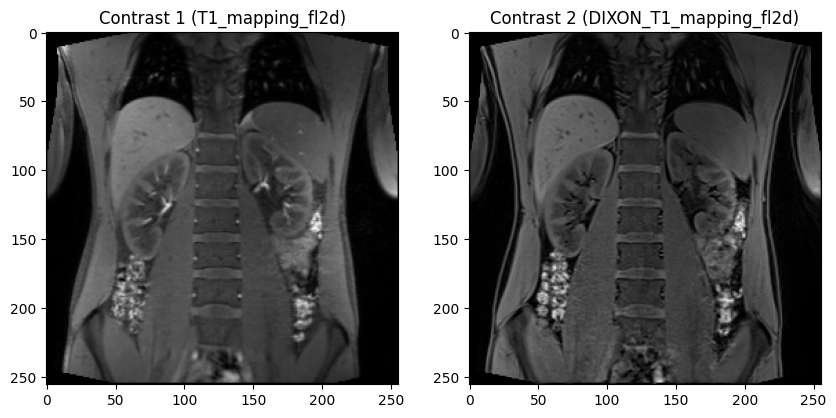

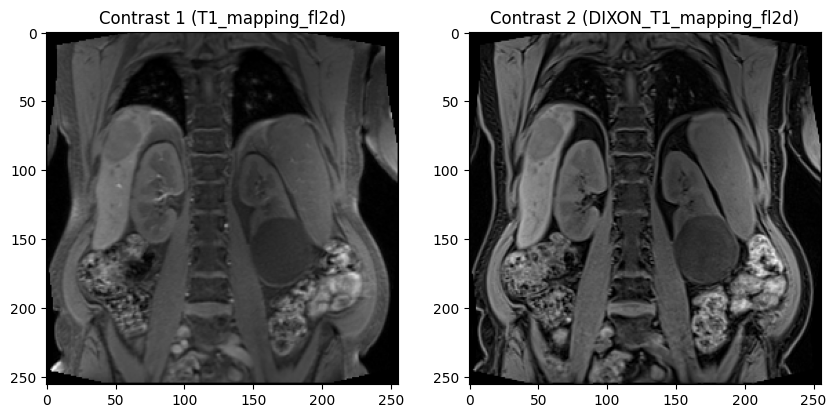

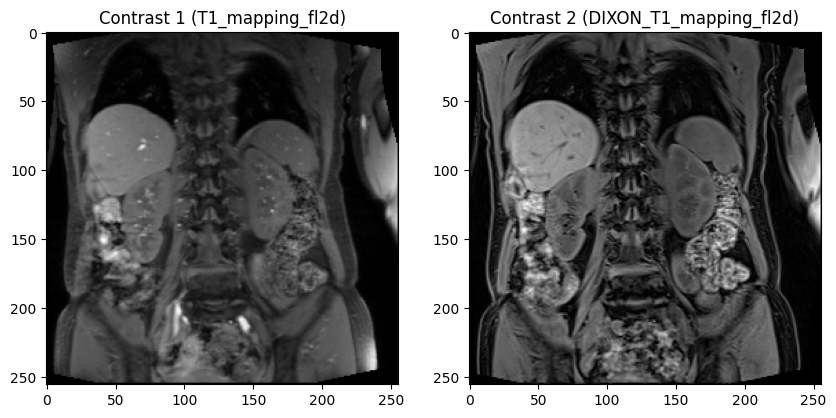

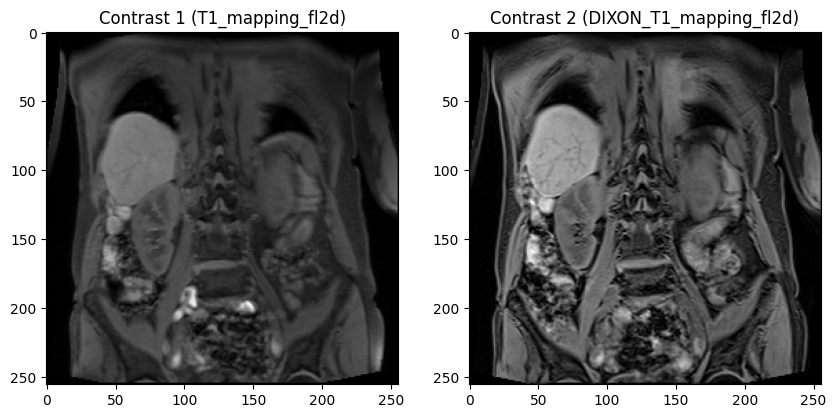

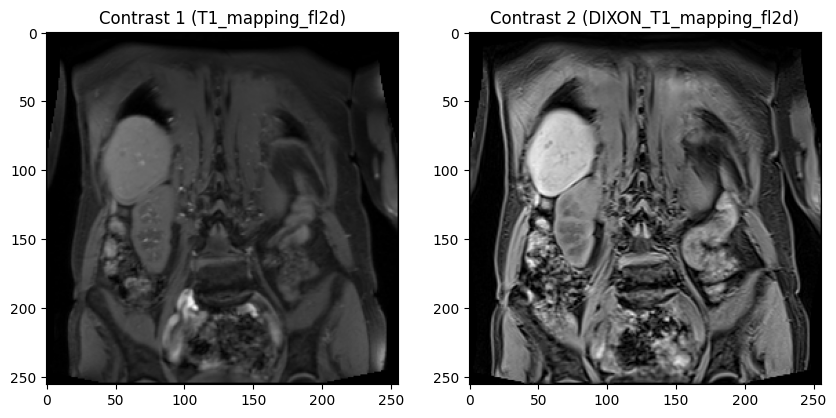

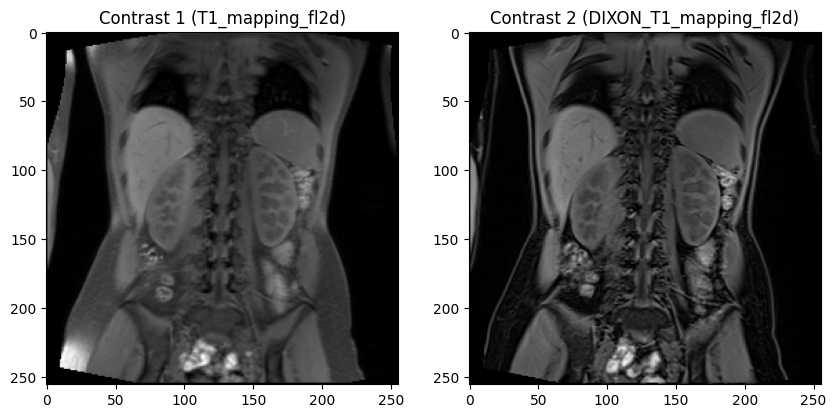

In [8]:

for iteration, (x_val , y_val) in enumerate(data_loader_val):
    real_data = x_val.to(device, non_blocking=True) # contrast1
    source_data = y_val.to(device, non_blocking=True) # contrast2
    if iteration % 20 == 0:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(real_data[0, 0, :, :].cpu().numpy(), cmap='gray')
        ax[0].set_title('Contrast 1 (T1_mapping_fl2d)')
        ax[1].imshow(source_data[0, 0, :, :].cpu().numpy(), cmap='gray')
        ax[1].set_title('Contrast 2 (DIXON_T1_mapping_fl2d)')
        plt.show()

In [9]:
print("Max value in real_data:", real_data.cpu().numpy().max())
print("Max value in source_data:", source_data.cpu().numpy().max())
print("Min value in real_data:", real_data.cpu().numpy().min())
print("Min value in source_data:", source_data.cpu().numpy().min())

Max value in real_data: 0.064401984
Max value in source_data: 0.6818743
Min value in real_data: -1.0
Min value in source_data: -1.0


In [ ]:
index = 40

image_dixon_1 = paired_dataset[index]["image_template"]
image_t1_1 = paired_dataset[index]["image_moving"]

image_dixon_1_norm = normalization(image_dixon_1)
image_t1_1_norm = normalization(image_t1_1)

image_dixon_2 = paired_dataset_group[index]["image_template"]
image_t1_2 = paired_dataset_group[index]["image_moving"]

image_dixon_2_norm = normalization(image_dixon_2)
image_t1_2_norm = normalization(image_t1_2)

fig, ax = plt.subplots(3, 2, figsize=(10, 20))
ax[0, 0].imshow(image_dixon_1[0, :, :].cpu().numpy(), cmap='gray')
ax[0, 0].set_title('DIXON Image 1')
ax[0, 1].imshow(image_t1_1[0, :, :].cpu().numpy(), cmap='gray')
ax[0, 1].set_title('T1 Image 1')
ax[1, 0].imshow(image_dixon_1_norm[0, :, :].cpu().numpy(), cmap='gray')
ax[1, 0].set_title('Normalized DIXON Image 1')
ax[1, 1].imshow(image_t1_1_norm[0, :, :].cpu().numpy(), cmap='gray')
ax[1, 1].set_title('Normalized T1 Image 1')

# plot real_data and source_data
ax[2, 1].imshow(t1_imgs[index][0,0,:,:], cmap='gray')
ax[2, 1].set_title('Real Data (T1_mapping_fl2d)')
ax[2, 0].imshow(dixon_imgs[index][0,0,:,:], cmap='gray')
ax[2, 0].set_title('Source Data (DIXON_T1_mapping_fl2d)') 
plt.tight_layout()
plt.show()